# Ensemble Averaged FID in Macroscopic Dilute Spin Ensembles

**Yuning Zhang, TU Delft, 2021.10.13**

In [10]:
using SpinEnsembles
using Statistics
using Plots
import SpecialFunctions: gamma
include("visualization.jl")

visualeffectivebeta

## Check the exponential power of the decay curve

The spin density of a $d$ dimensional ensemble is 
$$
\rho=\frac{f}{a^d}
$$

The average distance of spins are 
$$
\bar{r}\propto \sqrt[D]{\bar{V}}=\frac{a}{f^{1/D}}
$$

### Parameter Set
- To satisfy the continuum approximation, we need $\bar{r}\gg a$
- Filling rate should be less that $f \approx 10^{-3}$ for dilute spin system. 


#### 3D Dilute Case

Assume the lattice constant to be $a$. The spins are distributed in a spherical space, with a maximum radius $R$, then the total number of spins generated for each dimension is 
$$
N=\frac{V}{a^3}\cdot f=\frac{4\pi f R^3}{3 a^3}
$$

Set $f=10^{-5}$, then $\bar{r}\approx 46.4\,a$. Spin density $\rho=0.01$. If we set $R=30$, then the total number of spins would be $N\approx 1130$.

The coupling strength we using is 
$$
D_{ij}=\frac{1-3\cos^2(\theta_{ij})}{2r_{ij}^3} \gamma^2 \hbar
$$

Ignore the constant $\gamma^2 \hbar=1$, we except an decay curve 
$$
\langle G(t) \rangle_c=
\exp\left\{-\frac{1}{6} 
    \rho \,\pi^2
        { \,t}\cdot
        \frac{8}{3 \sqrt{3}}\right\}=\exp(-t/T_2)
$$

Thus 
$$
T_2= \frac{6}{\rho \,\pi^2} \frac{3 \sqrt{3}} {8} \approx 39.4
$$

Besides, we set configurational sampling number $M=2000$ and time sequence resolution $n_t=200$

In [2]:
a=0.1; f=1e-5; R=30; d=3; M=2000; n_t=200; M_t=1000;

1/(f^(1/d))

46.41588833612778

In [3]:
ρ = f/a^d

0.009999999999999998

In [4]:
N=floor(Int,(4pi*R^3/3)*ρ)

1130

In [5]:
T_2=6/(ρ*π^2)*(3*sqrt(3))/8

39.48602353909778

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


T_2 = 40.28997203433768
Residual: -3.4908505052890493e-16


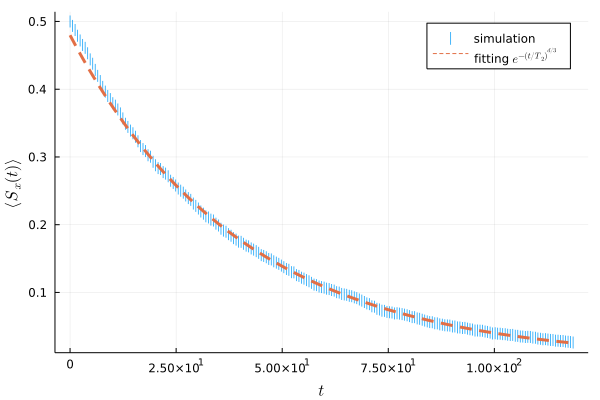

In [14]:
ensemble=SpinEnsemble(N,d,[0,0,1],a,R,:spherical)
T2=coherencetime(ensemble)
t=LinRange(0,3*T2,n_t+1);
FID_curve=fid(t,ensemble, M=M_t)
visualfid(t,FID_curve, fitting=true, cutoff=1, s=1,logscale=false)

In [15]:
savesvg()

#### 2D Dilute Case

Assume the lattice constant to be $a$. The spins are distributed in a circle on plate, with a maximum radius $R$, then the total number of spins generated for each dimension is 
$$
N=\frac{V}{a^2}\cdot f=\frac{\pi f R^2}{a^2}
$$

Set $f=10^{-3}$, then $\bar{r}\approx 31.6\,a$. Spin density $\rho=0.1$. If we set $R=40$, then the total number of spins would be $N\approx 502$.


In 2D case, the external Zeeman field is perpdendicular to the 2D plane, thus we except an decay curve 
$$
\langle G(t) \rangle_c=
\exp\left\{-\frac{\pi \rho}{2} 
    \Gamma\left(\frac{1}{3}\right)
    \left(
        \frac{t}{2} 
    \right)^{2/3}\right\}
$$


Thus 
$$
T_2= 2 \left[\frac{\rho \pi}{2} \Gamma \left(\frac{1}{3}\right)\right]^{-3/2} \approx 7.326
$$

Besides, we set configurational sampling number $M=2000$ and time sequence resolution $n_t=200$

In [16]:
a=0.1; f=1e-3; R=40; d=2; M=3000; n_t=200; M_t=1000;
1/(f^(1/d))

31.622776601683796

In [17]:
ρ = f/a^d

0.09999999999999998

In [18]:
N=floor(Int,(pi*R^2)*ρ)

502

In [19]:
T_2=2*(ρ*π/2*gamma(1/3))^(-3/2)

7.3266603028572925

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


T_2 = 7.3476304648360875
Residual: -4.695617228378524e-12


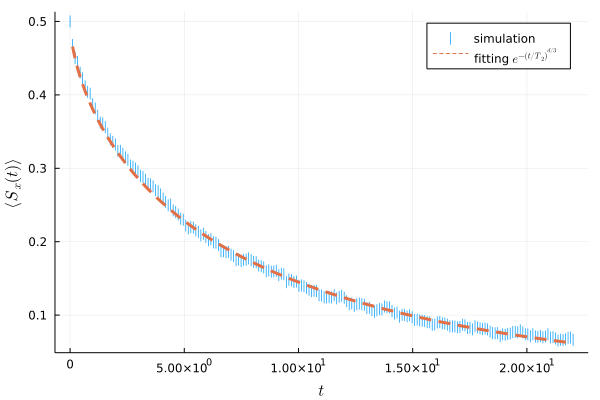

In [22]:
ensemble=SpinEnsemble(N,d,[0,0,1],a,R,:spherical)
T2=coherencetime(ensemble)
t=LinRange(0,3*T2,n_t+1);
FID_curve=fid(t,ensemble, M=M_t, N=300)
visualfid(t,FID_curve, fitting=true, cutoff=2, s=2/3,logscale=false)

In [23]:
savesvg()

#### 1D Dilute Case

Assume the lattice constant to be $a$. The spins are distributed in a spherical space, with a maximum radius $R$, then the total number of spins generated for each dimension is 
$$
N=\frac{V}{a}\cdot f=\frac{2 f R}{a}
$$

Set $f=10^{-2}$, then $\bar{r}\approx 100\,a$. Spin density $\rho=0.1$. If we set $R=1000$, then the total number of spins would be $N\approx 200$.


The external Zeeman field is perpdendicular to the 1D wire, $\theta=\pi/2$, thus we except an decay curve 
$$
\langle G(t) \rangle_c=
    \exp\left\{\frac{\rho}{\sqrt{3}} \Gamma(-1/3)
    \left(
        \frac{t}{2} 
    \right)^{1/3} 
    \right\}
$$


Thus 
$$
T_2= 2 \left[\frac{\rho}{\sqrt{3}} \Gamma(-1/3)\right]^{-3} \approx 155.01
$$

Besides, we set configurational sampling number $M=2000$ and time sequence resolution $n_t=200$

In [24]:
a=0.1; f=1e-2; R=1000; d=1; M=3000; n_t=200; M_t=1000;
1/(f^(1/d))

100.0

In [25]:
ρ = f/a^d

0.09999999999999999

In [26]:
N=ceil(Int,(2*R)*ρ)

200

In [27]:
T_2=-2*(ρ/sqrt(3)*gamma(-1/3))^(-3)

155.01675395300788

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


T_2 = 156.28412510549256
Residual: 1.2804019867579977e-14


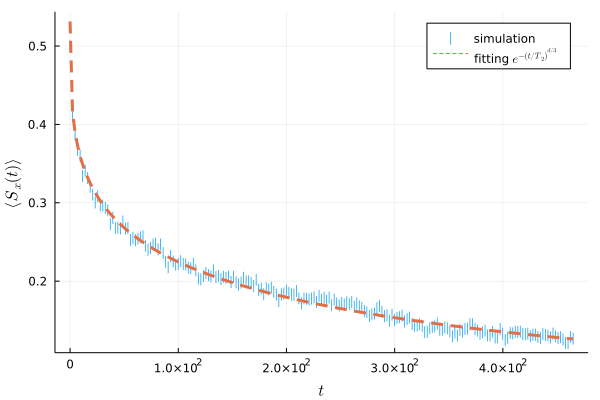

In [28]:
ensemble=SpinEnsemble(N,d,[0,0,1],a,R,:spherical)
T2=coherencetime(ensemble)
t=LinRange(0,3*T2,n_t+1);
FID_curve=fid(t,ensemble, M=M_t, N=300)
visualfid(t,FID_curve, fitting=true, cutoff=1, s=1/3,logscale=false)